In [1]:
##################################################################
# # ! Juno Magnetic Modelling using <Vector Potential> with <3 NNs>
# Plot showing the RMS errors of 'SH models' & `PINN Models` 
# computed at each perijove orbit of ***Juno Observation Orbits***
##################################################################
# %%
# # ! Setup
import numpy as np;
import matplotlib.pyplot as plt
from LW_DataReadWrite import *;
from LW_CoordinateTransformation import *;

In [2]:
# # ! RMS of PINN Models Estimations of |B| at <Obs>: at individual orbit
# TODO ******************** Parameters ******************** #
cstRj=71492;      # Jupiter radius in km
GS2nT=1e5;        # Gauss to nt
# TODO ********************** end ************************* #
fileObs='input/Juno_PJ01_33_4.0Rj.txt';
nObs,PJ,Year,DD,xObs,yObs,zObs,bxObs,byObs,bzObs = LoadObsFile(fileObs,showinfo=False);
_,LatObs,LonObs = ecef2sph(xObs,yObs,zObs,colat=False,degrees=True);
RObs=np.sqrt(xObs**2+yObs**2+zObs**2); 
RinRj=RObs/cstRj;
bNormObs = np.sqrt(bxObs**2 + byObs**2 + bzObs**2);
FILEs = ['output/JRM33_I30E1_nmax18_EstBxyz_OurObs33.txt',\
         'output/JRM33_I30E1_nmax30_EstBxyz_OurObs33.txt',\
         'output/Bloxham_I32E1_nmax18_EstBxyz_OurObs33.txt',\
         'output/Bloxham_I32E1_nmax32_EstBxyz_OurObs33.txt',\
         'output/JUNO_PINN_VP3_PJ01_33_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstBxyz_OurObs33.txt',\
         'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstBxyz_OurObs33.txt',];
MODELs = ['JRM33 (n=18)','JRM33 (n=30)','Baseline (n=18)','Baseline (n=32)','PINN33e','PINN50e'];

nMODEL = len(MODELs); 
RJBINs = np.linspace(1.0,4.0,31); 
nRJBIN = RJBINs.size;
RMS = [[] for i in range(nMODEL)]; # RMS on each orbit
E2 = [[] for i in range(nMODEL)];  # E2 error (L2 norm relative error %) on each orbit
ERRORs = [[] for i in range(nMODEL)];
for iMODEL in range(nMODEL):
     modelName = MODELs[iMODEL];
     fileEst = FILEs[iMODEL];
     dataEst=np.loadtxt(fileEst,skiprows=1);
     estBx=dataEst[:,6:7]; estBy=dataEst[:,7:8]; estBz=dataEst[:,8:9];
     estBNorm=np.sqrt(estBx**2+estBy**2+estBz**2);
     print('\n*********************\n',flush=True);
     print('RMS of %s evaluated at Juno <OBS>:'%(modelName),flush=True);
     for iRJBIN in range(nRJBIN-1):
          curRj1 = RJBINs[iRJBIN];
          curRj2 = RJBINs[iRJBIN+1];
          pkInd = np.logical_and((RinRj>=curRj1),(RinRj<curRj2),(RinRj<=4.0));
          refBx_lat = bxObs[pkInd]; refBy_lat = byObs[pkInd]; refBz_lat = bzObs[pkInd];
          refBNorm_lat = bNormObs[pkInd];
          estBx_lat = estBx[pkInd]; estBy_lat = estBy[pkInd]; estBz_lat = estBz[pkInd];
          estBNorm_lat = estBNorm[pkInd];
          # Delta |B|
          errBNorm1 = estBNorm_lat - refBNorm_lat;
          # |Delta B|
          errBNorm2 = np.sqrt((estBx_lat-refBx_lat)**2+(estBy_lat-refBy_lat)**2+(estBz_lat-refBz_lat)**2);
          print('Rj [%4d,%4d], NOB: %4d, '%(curRj1,curRj2,np.count_nonzero(pkInd)),end='',flush=True);
          rms = np.sqrt(np.mean(errBNorm1**2));
          e2 = rms/np.sqrt(np.mean(refBNorm_lat**2));
          print('rms = %8.1f nT; E2 = %8.4f %%'%(GS2nT*rms,100*e2),flush=True);
          RMS[iMODEL].append(GS2nT*rms);
          E2[iMODEL].append(100*e2);
          ERRORs[iMODEL].append(GS2nT*errBNorm1);
     print('',flush=True); # <br>


*********************

RMS of JRM33 (n=18) evaluated at Juno <OBS>:
Rj [   1,   1], NOB: 1167, rms =   2671.5 nT; E2 =   0.5065 %
Rj [   1,   1], NOB: 1058, rms =    865.8 nT; E2 =   0.1954 %
Rj [   1,   1], NOB:  753, rms =    345.9 nT; E2 =   0.1003 %
Rj [   1,   1], NOB:  646, rms =    365.9 nT; E2 =   0.1300 %
Rj [   1,   1], NOB:  601, rms =    426.9 nT; E2 =   0.1824 %
Rj [   1,   1], NOB:  576, rms =    432.0 nT; E2 =   0.2184 %
Rj [   1,   1], NOB:  550, rms =    413.4 nT; E2 =   0.2457 %
Rj [   1,   1], NOB:  549, rms =    399.7 nT; E2 =   0.2780 %
Rj [   1,   1], NOB:  543, rms =    387.3 nT; E2 =   0.3142 %
Rj [   1,   2], NOB:  543, rms =    381.3 nT; E2 =   0.3591 %
Rj [   2,   2], NOB:  550, rms =    376.8 nT; E2 =   0.4095 %
Rj [   2,   2], NOB:  545, rms =    371.8 nT; E2 =   0.4664 %
Rj [   2,   2], NOB:  535, rms =    361.9 nT; E2 =   0.5206 %
Rj [   2,   2], NOB:  537, rms =    352.5 nT; E2 =   0.5791 %
Rj [   2,   2], NOB:  544, rms =    344.4 nT; E2 =   0.6433 %
R

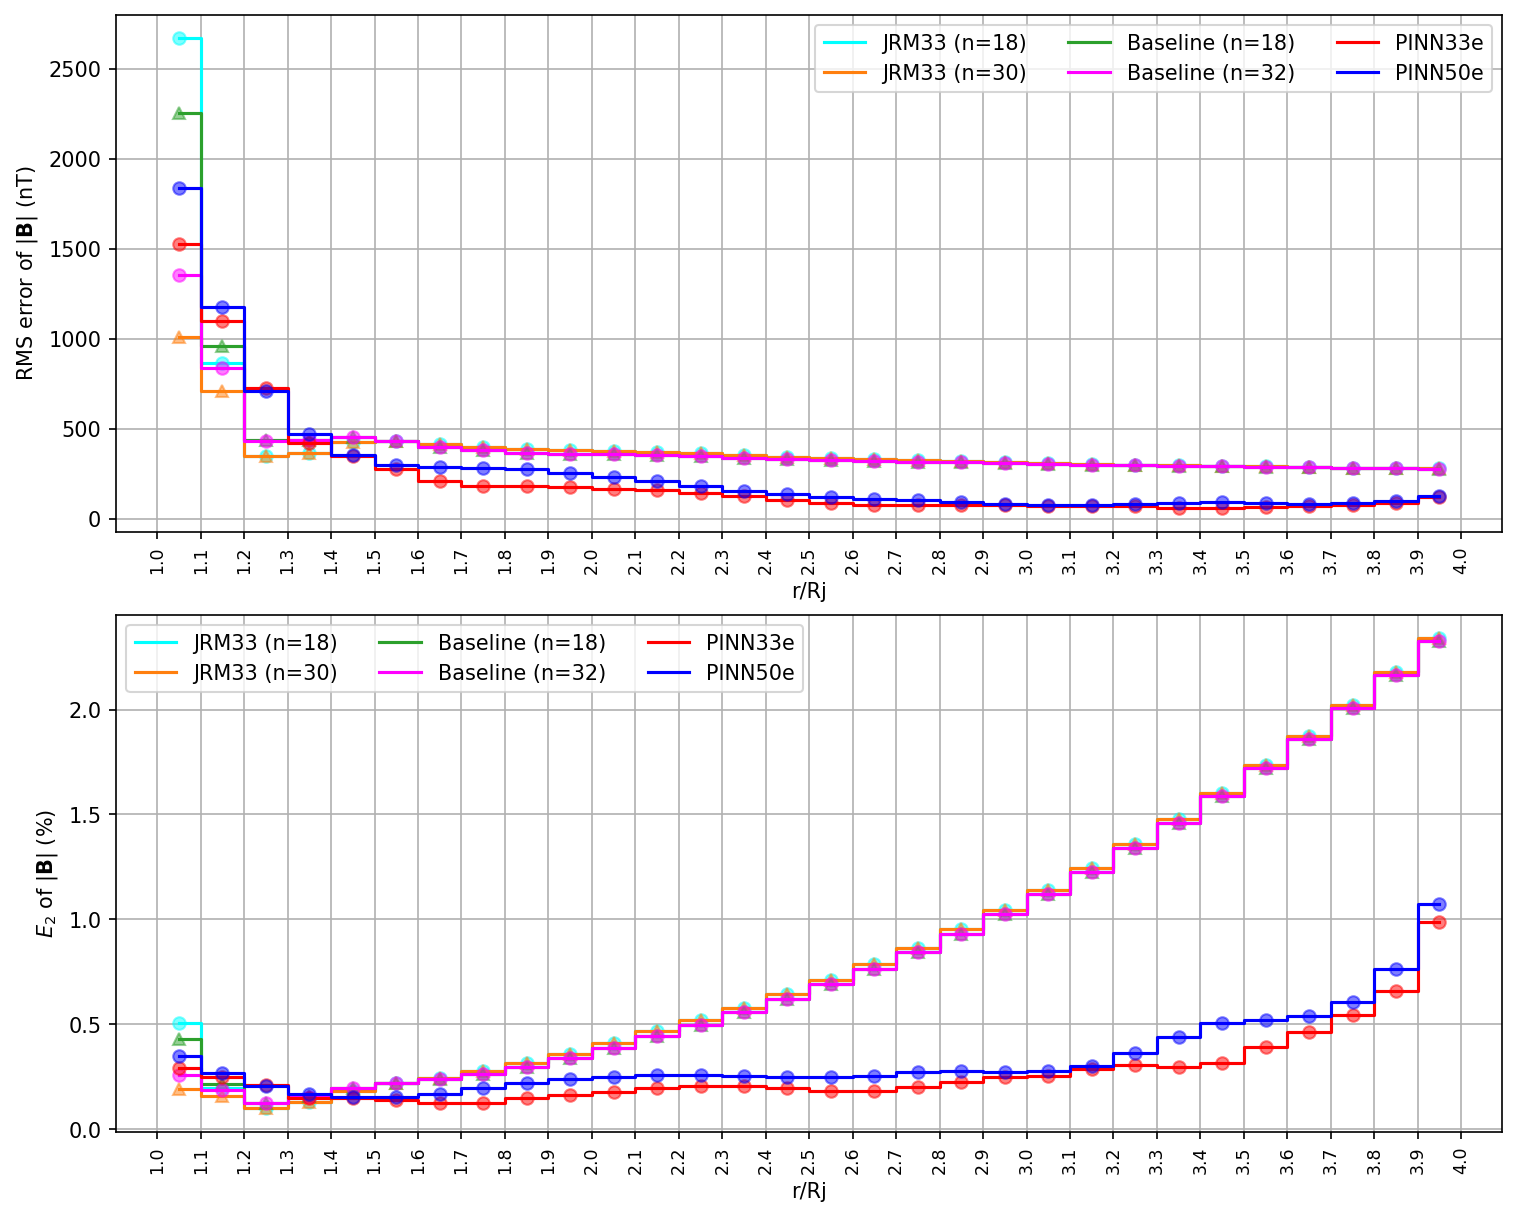

In [3]:
# # ! Plot of PINN Models Estimations Error of |B| at <Obs>: at individual orbit
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), dpi=150, layout='constrained');
yLables=['RMS error of $|\mathbf{B}|$ (nT)','$E_2$ of $|\mathbf{B}|$ (%)'];
COLORs =['#00FFFF','C1','C2','#FF00FF','#FF0000','#0000FF'];
LSs = ['-','-','-','-','-','-'];
MARKERs =['o','^','^','o','o','o'];
for iMODEL in range(nMODEL):
     modelName = MODELs[iMODEL];
     axs[0].step((RJBINs[0:-1]+RJBINs[1:])/2,RMS[iMODEL],color=COLORs[iMODEL],linestyle=LSs[iMODEL],where='mid',label=modelName);
     axs[0].plot((RJBINs[0:-1]+RJBINs[1:])/2,RMS[iMODEL], MARKERs[iMODEL], color=COLORs[iMODEL],linestyle='',alpha=0.5);
     axs[1].step((RJBINs[0:-1]+RJBINs[1:])/2,E2[iMODEL], color=COLORs[iMODEL],linestyle=LSs[iMODEL],where='mid',label=modelName);
     axs[1].plot((RJBINs[0:-1]+RJBINs[1:])/2,E2[iMODEL],  MARKERs[iMODEL], color=COLORs[iMODEL],linestyle='',alpha=0.5);
for iax in range(len(axs)):
     axs[iax].set_xticks(RJBINs);
     axs[iax].xaxis.grid(True);
     axs[iax].yaxis.grid(True);
     axs[iax].set_xlabel('r/Rj');
     axs[iax].set_ylabel(yLables[iax]);
     axs[iax].legend(loc='best', ncol = 3)  # Add a legend
     axs[iax].tick_params(axis='x',which='major',labelrotation=90,labelsize='small');
plt.savefig('Plot_DataMissfit_SHs_vs_PINNs_OurObs33_byRj.png',dpi=300);
plt.show();